In [3]:
import numpy as np

#numpy use kore ekta array banacchi jekhane 10 ta number nicchi 'X' e & shape hocche 5ta row,2ta column...and 
# 'y' e (comma diye alada kora) ta number nicchi
X,y = np.arange(10).reshape((5,2)), range(5) 

X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
y

range(0, 5)

In [5]:
list(y)

[0, 1, 2, 3, 4]

### train test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)

In [8]:
X_train #amader 5ta row data theke 3ta row train e

array([[2, 3],
       [8, 9],
       [4, 5]])

In [9]:
X_test

array([[0, 1],
       [6, 7]])

In [10]:
y_train #jehetu 3ta row X_train e chilo, tai y eo 3ta record thakbe...test dataset o same pattern follow kore

[1, 4, 2]

In [11]:
y_test

[0, 3]

In [12]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

## starting main task

In [13]:
# Step 1

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [14]:
# checking numbers of features and targets

print(X.shape) #150ta row, 4ta column
print(y.shape) #150ta row, 1ta columns

(150, 4)
(150,)


In [15]:
# Step 2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) #default train test split (75:25) 

In [16]:
print(X_train.shape) #checking number of features
print(X_test.shape)

(112, 4)
(38, 4)


In [17]:
print(y_train.shape) #checking number of targets
print(y_test.shape)

(112,)
(38,)


In [18]:
# incase u r want to change default train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [19]:
print(X_test.shape)
print(y_test.shape)

(60, 4)
(60,)


In [20]:
# Step 3

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
# Step 4

# predicting using test data
y_pred = knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_pred, y_test))

0.9666666666666667


In [24]:
# if n_neighbors =5,

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

print(metrics.accuracy_score(y_pred1, y_test))

0.9666666666666667


## how many number of neighbors is better for the accuracy

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state = 4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
# starting loop for n_neighbors 1 to 25

neighbors_settings = list(range(1,26))
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred2 = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred2))

Text(0, 0.5, 'Accuracy')

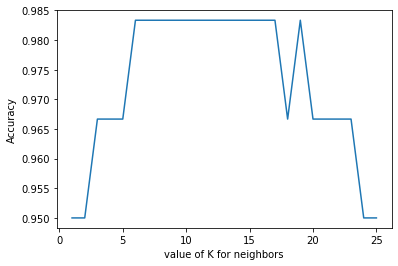

In [32]:
# plotting k(n_neighbors value) and scores

import matplotlib.pyplot as plt

#to show jupyter notebook inline
%matplotlib inline

plt.plot(neighbors_settings, scores)

plt.xlabel('value of K for neighbors')
plt.ylabel('Accuracy')

In [33]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
print(accuracy_score(y_pred3, y_test))

0.9833333333333333


In [37]:
# testing our model with out of sample data

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X,y)

y_pred5 = knn.predict([[3,5,4,2]])
y_pred5

array([1])

In [38]:
print('target names: ',iris.target_names[y_pred5])

target names:  ['versicolor']
